In [1]:
%load_ext autoreload
%autoreload 2

In [189]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from path_explain import utils
from plot.scatter import scatter_plot, _set_axis_config
from plot.summary import summary_plot

In [3]:
dataset = tfds.load(name='higgs', split='train')
feature_names = list(dataset.output_shapes.keys())[1:]

In [4]:
attributions  = np.load('attributions.npy')
interactions  = np.load('interactions.npy')
input_samples = np.load('input_samples.npy')

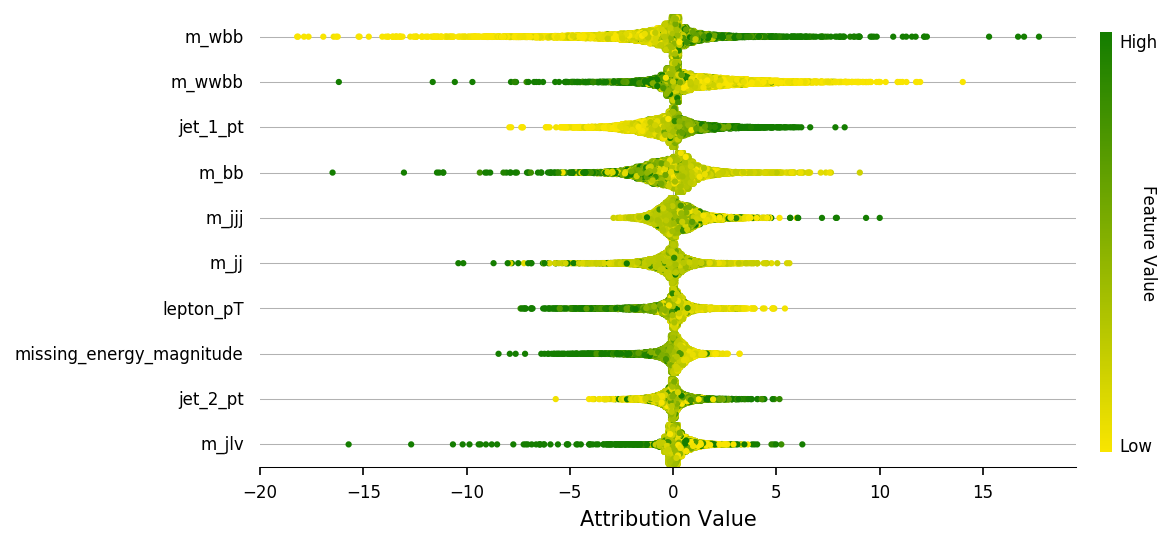

In [5]:
summary_plot(attributions,
             input_samples,
             feature_names=feature_names,
             plot_top_k=10,
             standardize_features=True)

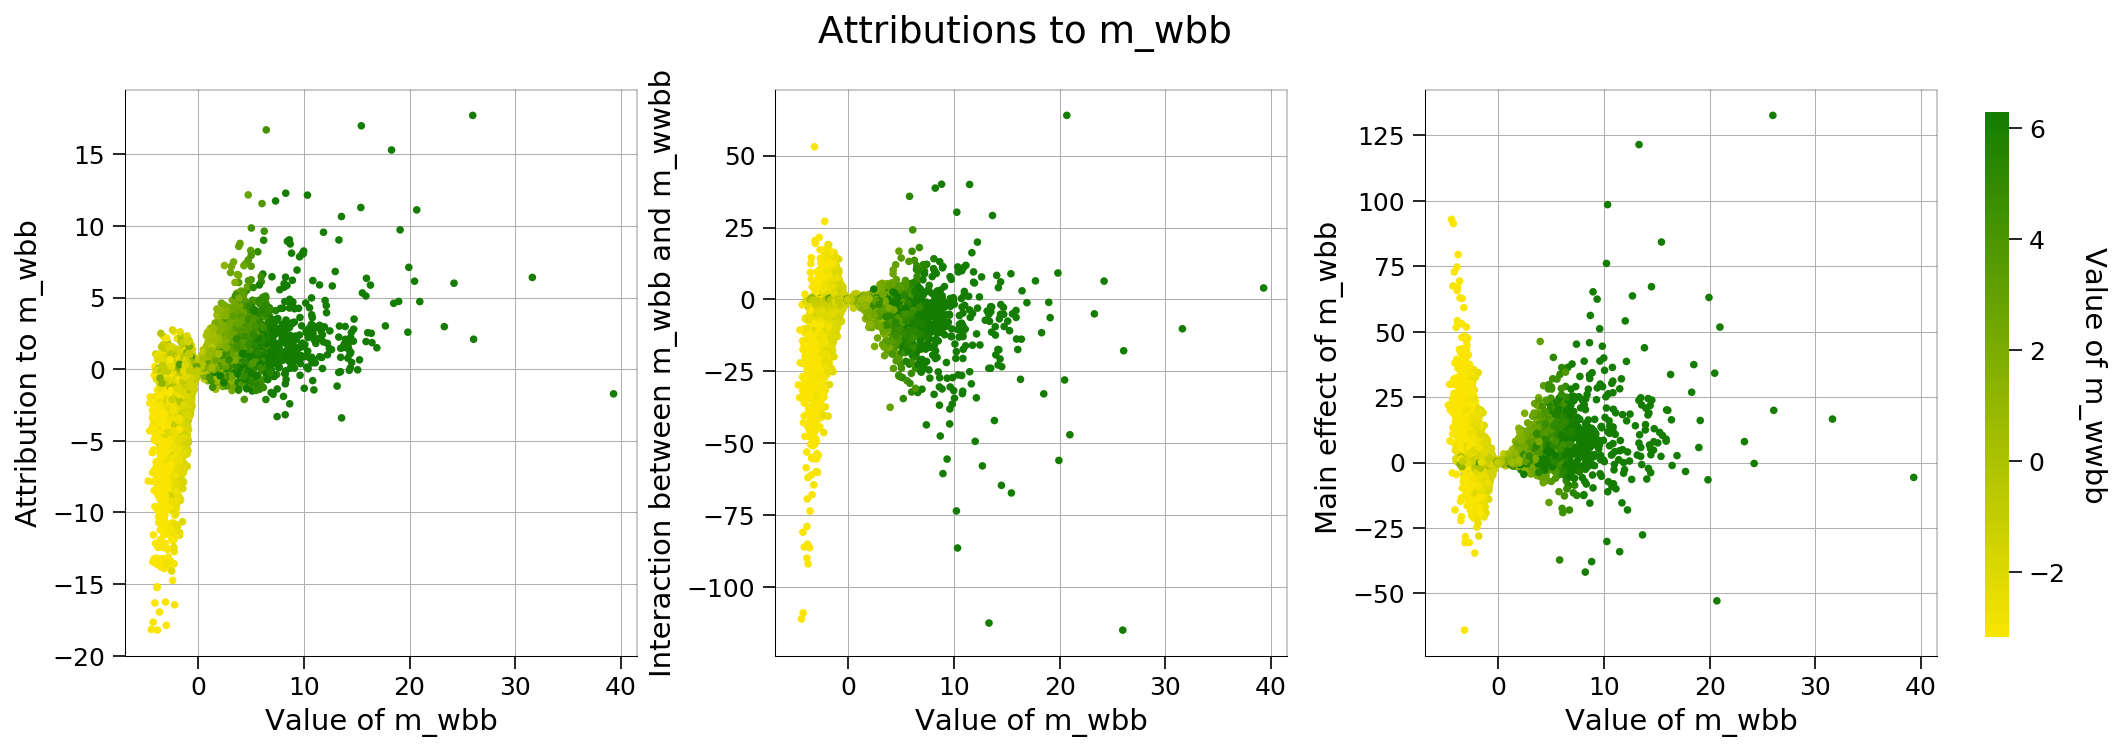

In [203]:
fig, axs = scatter_plot(attributions,
                        input_samples,
                        feature_index='m_wbb',
                        interactions=interactions,
                        color_by='m_wwbb',
                        feature_names=feature_names,
                        scale_x_ind=True,
                        scale_y_ind=True)

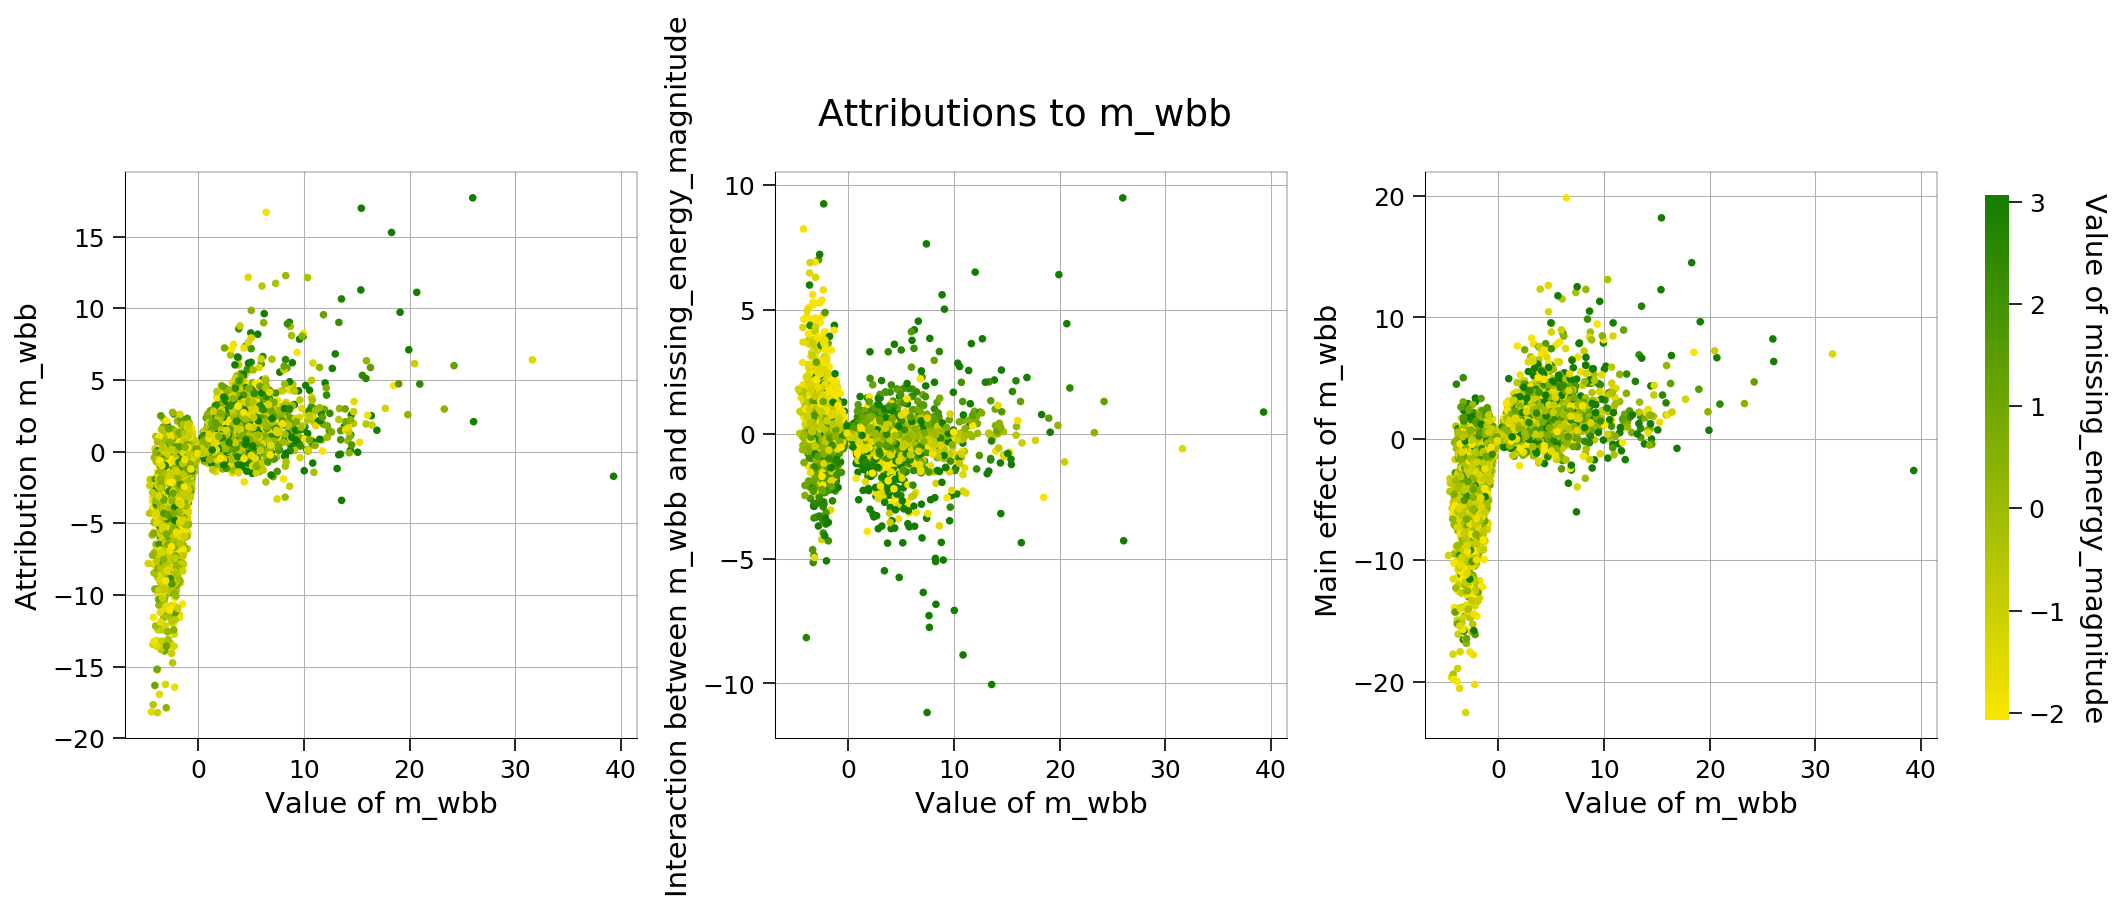

In [202]:
fig, axs = scatter_plot(attributions,
                        input_samples,
                        feature_index='m_wbb',
                        interactions=interactions,
                        color_by='missing_energy_magnitude',
                        feature_names=feature_names,
                        scale_x_ind=True,
                        scale_y_ind=True)

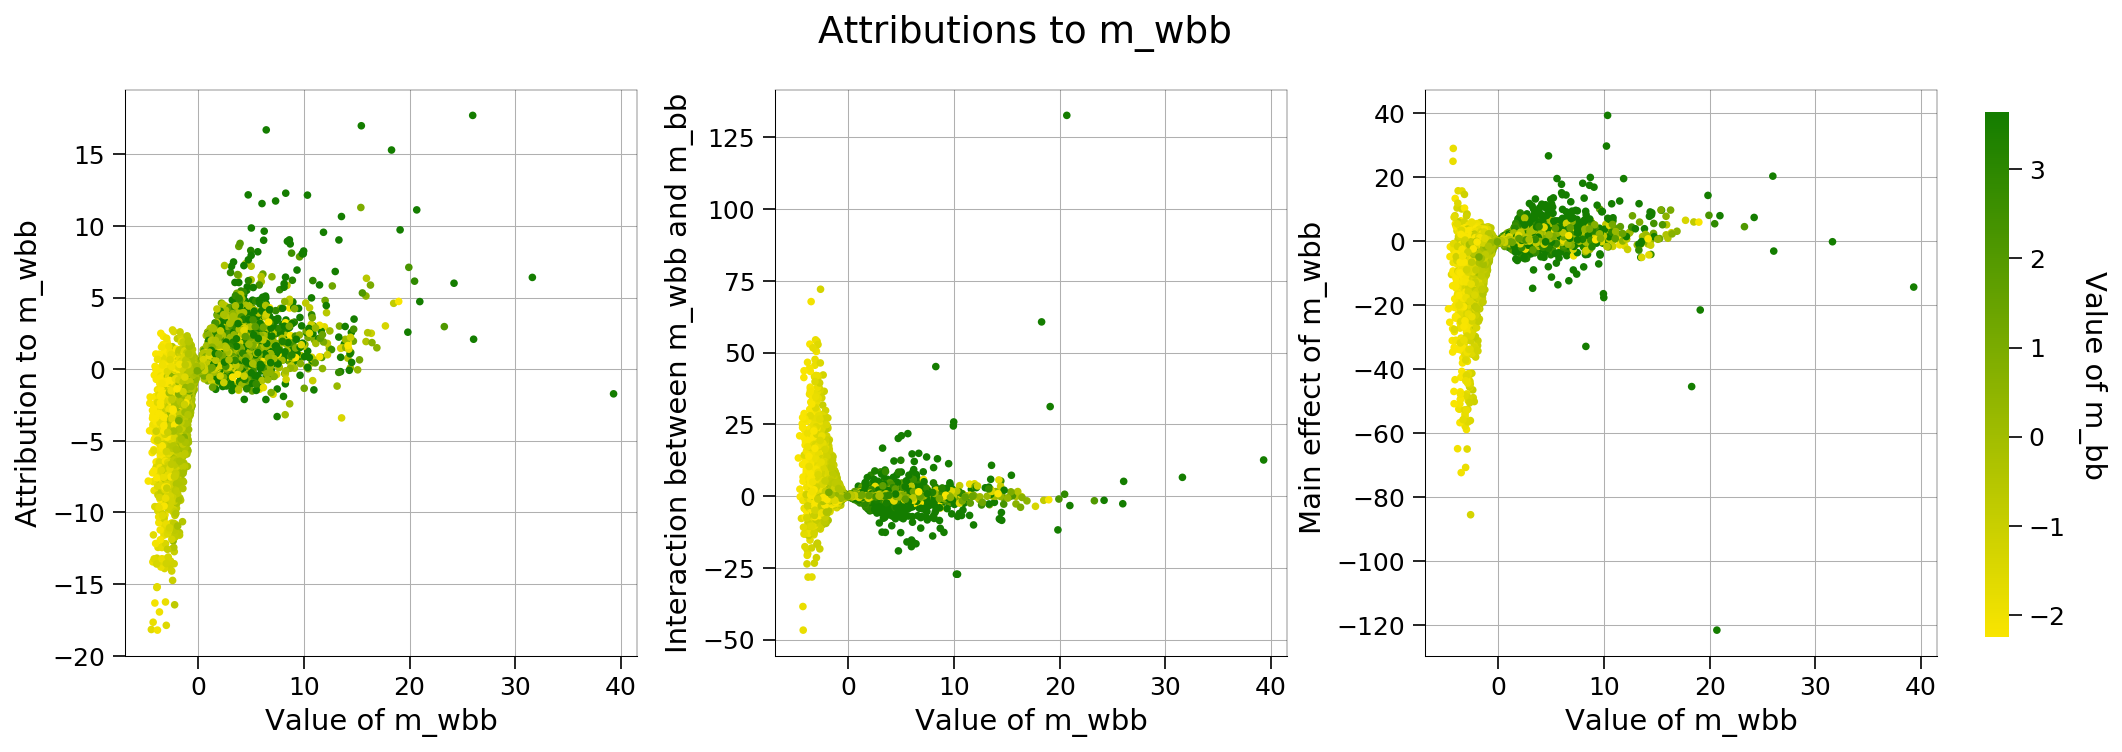

In [88]:
fig, axs = scatter_plot(attributions,
                        input_samples,
                        feature_index='m_wbb',
                        interactions=interactions,
                        color_by='m_bb',
                        feature_names=feature_names,
                        scale_x_ind=True,
                        scale_y_ind=True)

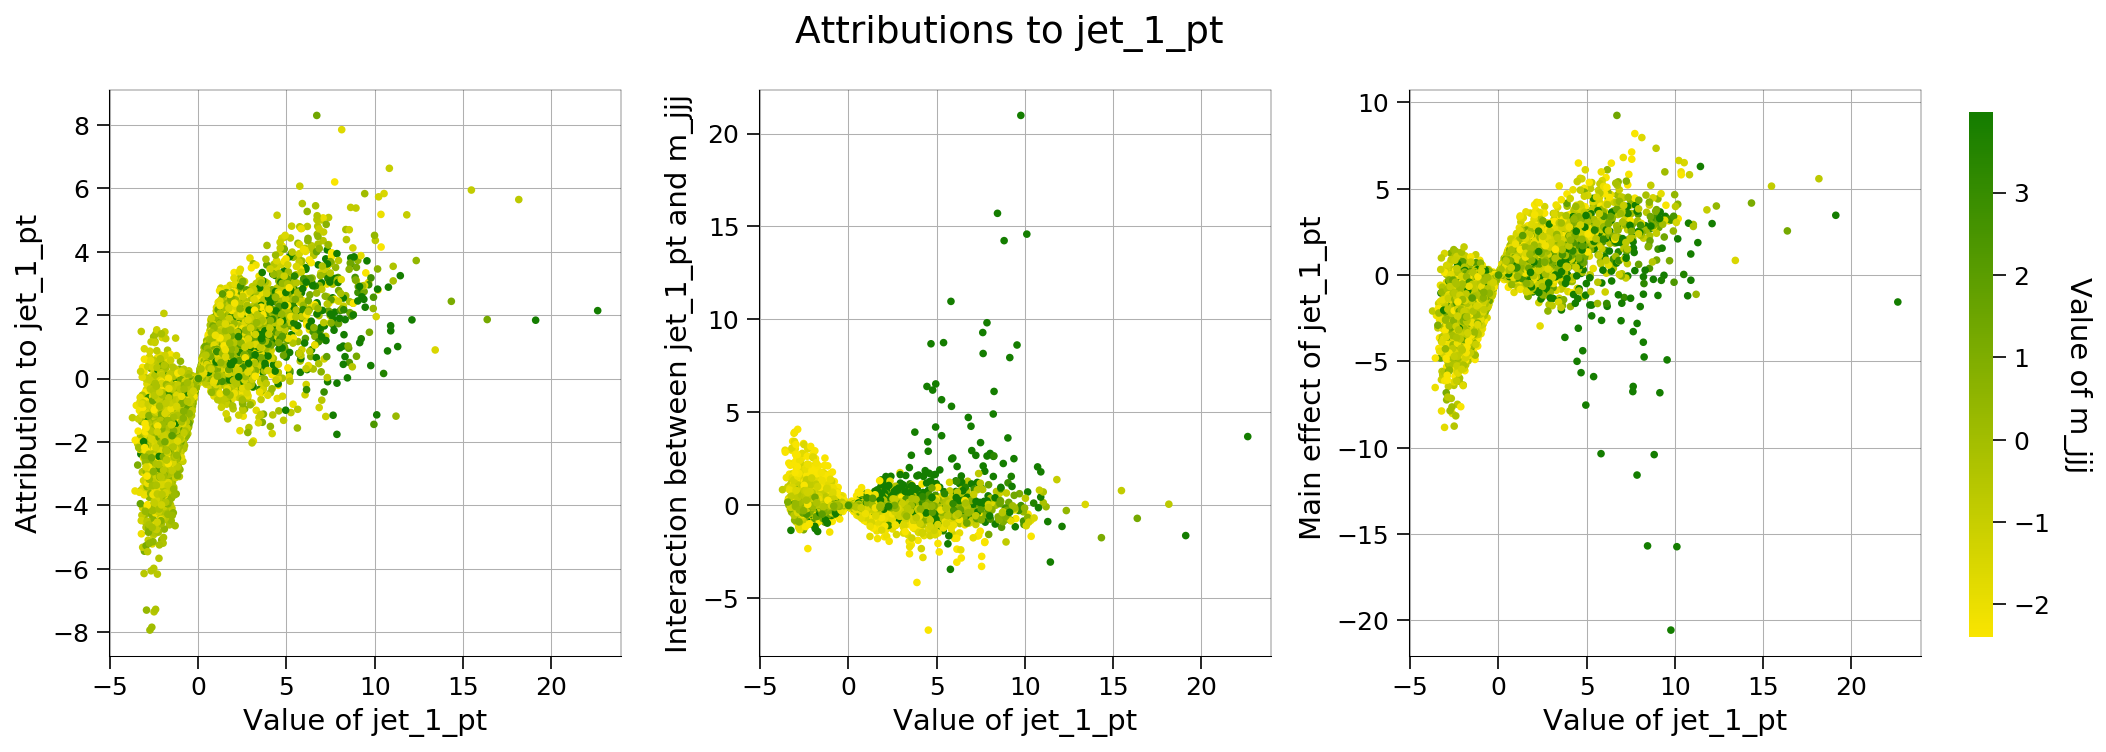

In [29]:
fig, axs = scatter_plot(attributions,
                        input_samples,
                        feature_index='jet_1_pt',
                        interactions=interactions,
                        color_by='m_jjj',
                        feature_names=feature_names,
                        scale_x_ind=True,
                        scale_y_ind=True)

In [154]:
mean_abs_interactions = np.mean(np.abs(interactions), axis=0)
mean_abs_attributions = np.mean(np.abs(attributions), axis=0)
top_index = np.argsort(mean_abs_attributions)[::-1][:7]

In [177]:
top_abs_interactions = mean_abs_interactions[top_index, :]
top_abs_interactions = top_abs_interactions[:, top_index]
normalized_top_abs_interactions = top_abs_interactions / np.sum(top_abs_interactions, axis=0)
top_abs_attributions = mean_abs_attributions[top_index]
top_feature_names = np.array(feature_names)[top_index]

In [181]:
left_bars = np.cumsum(normalized_top_abs_interactions, axis=0)

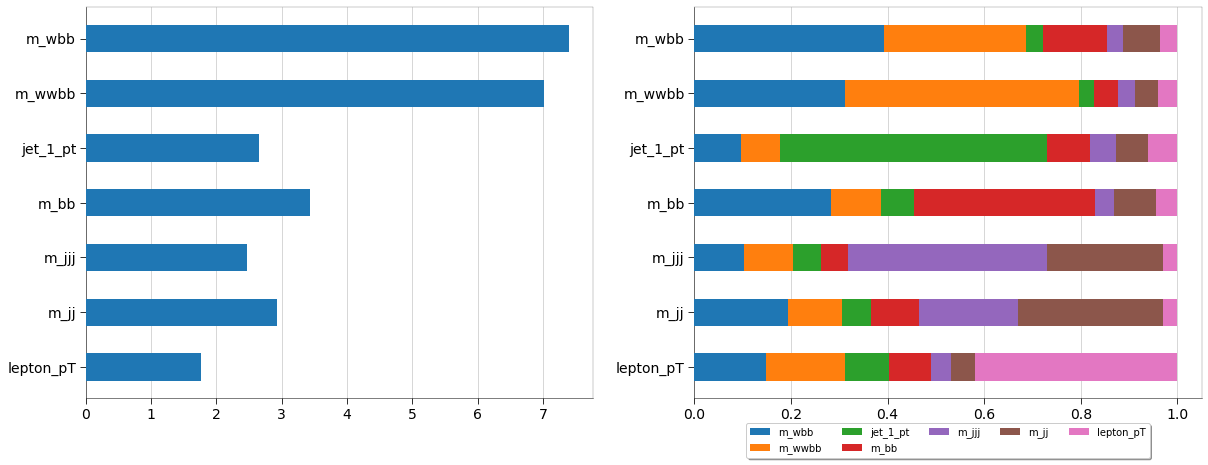

In [198]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

ax = axs[0]
ax.grid(axis='x', zorder=0, linewidth=0.5)
ax.tick_params(length=6, labelsize=14)
_set_axis_config(ax, linewidths=[0.2, 0.2, 0.5, 0.5])
ax.barh(inds,
        np.sum(top_abs_interactions, axis=0),
        height=0.5,
        zorder=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.set_yticks(inds)
ax.set_yticklabels(top_feature_names, rotation='horizontal')

ax = axs[1]
ax.grid(axis='x', zorder=0, linewidth=0.5)
ax.tick_params(length=6, labelsize=14)
_set_axis_config(ax, linewidths=[0.2, 0.2, 0.5, 0.5])
inds = np.arange(normalized_top_abs_interactions.shape[0])[::-1]
plots = []
for i in range(normalized_top_abs_interactions.shape[0]):
    if i == 0:
        left = None
    else:
        left = left_bars[i - 1]

    plot = ax.barh(inds,
                    normalized_top_abs_interactions[i],
                    height=0.5,
                    zorder=10,
                    left=left)
    plots.append(plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.legend(plots, top_feature_names,
          loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_yticks(inds)
_ = ax.set_yticklabels(top_feature_names, rotation='horizontal')

Note to self: I think what this is telling me is that the model is using correlated features to overfit! It's possible that by dropping related features we would see a performance increase. Test this hypothesis!